# Of Renewable energy types, which are growing?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### Energy sources are in separate csv files.  Many data sources need to be combined into one.

In [170]:
#combining all datasets using map function

import glob
import pandas as pd 

#map renewables

df_renew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df_renew.rename(columns={'Country or Area':'Geo'}, inplace=True)

#map nonrenewables

df_nonrenew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_nonrenewable/*.csv')))
df_nonrenew.rename(columns={'Country or Area':'Geo'}, inplace=True)

df = pd.concat([df_renew, df_nonrenew])

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df = df[df['Transaction'] == 'production']

#df.shape




In [171]:
#import dataframe with conversion units
import pandas as pd 
unit_conv = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/renewable_energy_units_conv_2.csv')

In [178]:
#merge dataframes with conversion units

df_merge = pd.merge(df,  
                     unit_conv,  
                     on ='Commodity', 
                     how ='left') 

df_merge['TJ'] = df_merge['Quantity'] * df_merge['Conv_mt_to_tj']

In [173]:

#sum all renewables
lt_2019_r = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'renewable')]
tot_r_grp_year = lt_2019_r.groupby(['Year'])
df_tot_year_r = tot_r_grp_year['TJ'].agg(['sum'])

lt_2019_r.Commodity.unique()

array(['animal waste', 'bagasse', 'biodiesel', 'biogases', 'biogasoline',
       'black liquor', 'charcoal', 'fuelwood', 'geothermal electricity',
       'hydro electricity', 'industrial waste', 'municipal wastes',
       'vegetal waste', 'solar electricity', 'tide electricity',
       'wind electricity', 'other recovered gases'], dtype=object)

In [174]:
# need a function to automate below and do so for nonrenewable types


AxesSubplot(0.125,0.125;0.775x0.755)


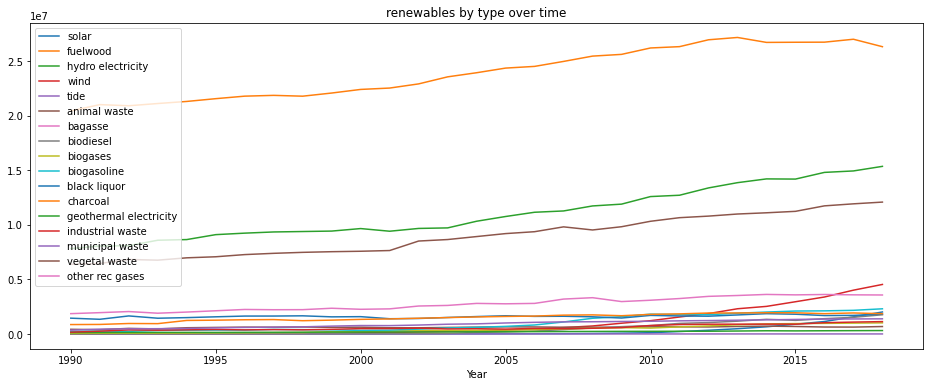

In [176]:
import matplotlib.pyplot as plt 

#filter
df_merge = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'renewable')]

#sum each type, group by year
df_other = df_merge[df_merge['Commodity'] == 'other receovered gases']
other_grp_year = df_other.groupby(['Year'])
tot_other = other_grp_year['TJ'].agg(['sum'])
tot_other.sort_values(by='Year', ascending=True, inplace=True)
tot_other.rename(columns={'sum':'other rec gases'}, inplace=True)

df_wind = df_merge[df_merge['Commodity'] == 'wind electricity']
wind_grp_year = df_wind.groupby(['Year'])
tot_wind = wind_grp_year['TJ'].agg(['sum'])
tot_wind.sort_values(by='Year', ascending=True, inplace=True)
tot_wind.rename(columns={'sum':'wind'}, inplace=True)

df_tide = df_merge[df_merge['Commodity'] == 'tide electricity']
tide_grp_year = df_tide.groupby(['Year'])
tot_tide = tide_grp_year['TJ'].agg(['sum'])
tot_tide.sort_values(by='Year', ascending=True, inplace=True)
tot_tide.rename(columns={'sum':'tide'}, inplace=True)

df_solar = df_merge[df_merge['Commodity'] == 'solar electricity']
solar_grp_year = df_solar.groupby(['Year'])
tot_solar = solar_grp_year['TJ'].agg(['sum'])
tot_solar.sort_values(by='Year', ascending=True, inplace=True)
tot_solar.rename(columns={'sum':'solar'}, inplace=True)

df_peatproducts = df_merge[df_merge['Commodity'] == 'peat products']
peatproducts_grp_year = df_peatproducts.groupby(['Year'])
tot_peatproducts = peatproducts_grp_year['TJ'].agg(['sum'])
tot_peatproducts.sort_values(by='Year', ascending=True, inplace=True)
tot_peatproducts.rename(columns={'sum':'peat products'}, inplace=True)

df_peat = df_merge[df_merge['Commodity'] == 'peat']
peat_grp_year = df_peat.groupby(['Year'])
tot_peat = peat_grp_year['TJ'].agg(['sum'])
tot_peat.sort_values(by='Year', ascending=True, inplace=True)
tot_peat.rename(columns={'sum':'peat'}, inplace=True)

df_vegwa = df_merge[df_merge['Commodity'] == 'vegetal waste']
vegwa_grp_year = df_vegwa.groupby(['Year'])
tot_vegwa = vegwa_grp_year['TJ'].agg(['sum'])
tot_vegwa.sort_values(by='Year', ascending=True, inplace=True)
tot_vegwa.rename(columns={'sum':'vegetal waste'}, inplace=True)

df_munwa = df_merge[df_merge['Commodity'] == 'municipal wastes']
munwa_grp_year = df_munwa.groupby(['Year'])
tot_munwa = munwa_grp_year['TJ'].agg(['sum'])
tot_munwa.sort_values(by='Year', ascending=True, inplace=True)
tot_munwa.rename(columns={'sum':'municipal waste'}, inplace=True)

df_inwa = df_merge[df_merge['Commodity'] == 'industrial waste']
inwa_grp_year = df_inwa.groupby(['Year'])
tot_inwa = inwa_grp_year['TJ'].agg(['sum'])
tot_inwa.sort_values(by='Year', ascending=True, inplace=True)
tot_inwa.rename(columns={'sum':'industrial waste'}, inplace=True)

df_hydro = df_merge[df_merge['Commodity'] == 'hydro electricity']
hydro_grp_year = df_hydro.groupby(['Year'])
tot_hydro = hydro_grp_year['TJ'].agg(['sum'])
tot_hydro.sort_values(by='Year', ascending=True, inplace=True)
tot_hydro.rename(columns={'sum':'hydro electricity'}, inplace=True)

df_geotherm = df_merge[df_merge['Commodity'] == 'geothermal electricity']
geotherm_grp_year = df_geotherm.groupby(['Year'])
tot_geotherm = geotherm_grp_year['TJ'].agg(['sum'])
tot_geotherm.sort_values(by='Year', ascending=True, inplace=True)
tot_geotherm.rename(columns={'sum':'geothermal electricity'}, inplace=True)

df_fuelwood = df_merge[df_merge['Commodity'] == 'fuelwood']
fuelwood_grp_year = df_fuelwood.groupby(['Year'])
tot_fuelwood = fuelwood_grp_year['TJ'].agg(['sum'])
tot_fuelwood.sort_values(by='Year', ascending=True, inplace=True)
tot_fuelwood.rename(columns={'sum':'fuelwood'}, inplace=True)

df_charcoal = df_merge[df_merge['Commodity'] == 'charcoal']
charcoal_grp_year = df_charcoal.groupby(['Year'])
tot_charcoal = charcoal_grp_year['TJ'].agg(['sum'])
tot_charcoal.sort_values(by='Year', ascending=True, inplace=True)
tot_charcoal.rename(columns={'sum':'charcoal'}, inplace=True)

df_bllq = df_merge[df_merge['Commodity'] == 'black liquor']
bllq_grp_year = df_bllq.groupby(['Year'])
tot_bllq = bllq_grp_year['TJ'].agg(['sum'])
tot_bllq.sort_values(by='Year', ascending=True, inplace=True)
tot_bllq.rename(columns={'sum':'black liquor'}, inplace=True)

df_anwa = df_merge[df_merge['Commodity'] == 'animal waste']
anwa_grp_year = df_anwa.groupby(['Year'])
tot_anwa = anwa_grp_year['TJ'].agg(['sum'])
tot_anwa.sort_values(by='Year', ascending=True, inplace=True)
tot_anwa.rename(columns={'sum':'animal waste'}, inplace=True)

df_bagasse = df_merge[df_merge['Commodity'] == 'bagasse']
bagasse_grp_year = df_bagasse.groupby(['Year'])
tot_bagasse = bagasse_grp_year['TJ'].agg(['sum'])
tot_bagasse.sort_values(by='Year', ascending=True, inplace=True)
tot_bagasse.rename(columns={'sum':'bagasse'}, inplace=True)

df_biod = df_merge[df_merge['Commodity'] == 'biodiesel']
biod_grp_year = df_biod.groupby(['Year'])
tot_biod = biod_grp_year['TJ'].agg(['sum'])
tot_biod.sort_values(by='Year', ascending=True, inplace=True)
tot_biod.rename(columns={'sum':'biodiesel'}, inplace=True)

df_biogs = df_merge[df_merge['Commodity'] == 'biogases']
biogs_grp_year = df_biogs.groupby(['Year'])
tot_biogs = biogs_grp_year['TJ'].agg(['sum'])
tot_biogs.sort_values(by='Year', ascending=True, inplace=True)
tot_biogs.rename(columns={'sum':'biogases'}, inplace=True)

df_biogn = df_merge[df_merge['Commodity'] == 'biogasoline']
biogn_grp_year = df_biogn.groupby(['Year'])
tot_biogn = biogn_grp_year['TJ'].agg(['sum'])
tot_biogn.sort_values(by='Year', ascending=True, inplace=True)
tot_biogn.rename(columns={'sum':'biogasoline'}, inplace=True)



merged_comm = pd.concat([tot_solar, tot_fuelwood, tot_hydro, tot_wind, tot_tide, tot_anwa, tot_bagasse, tot_biod, tot_biogs, tot_biogn, tot_bllq, tot_charcoal, tot_geotherm, tot_inwa, tot_munwa, tot_vegwa, tot_other], axis=1)

print(merged_comm.plot(figsize=(16,6), title='renewables by type over time'))


AxesSubplot(0.125,0.125;0.775x0.755)


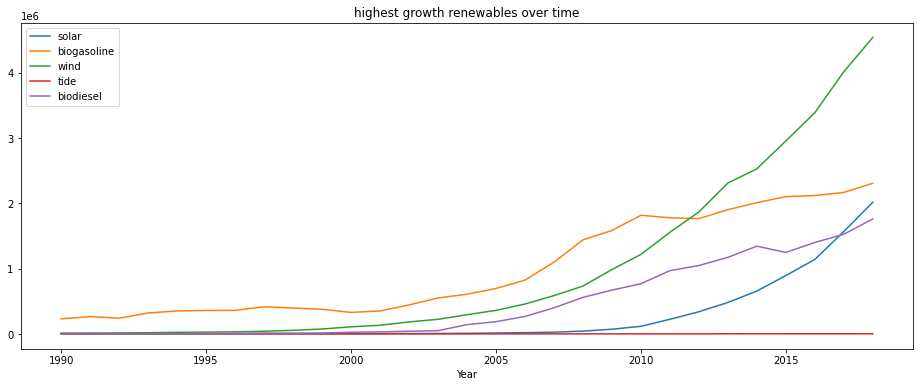

In [177]:
merged_steep_slope = pd.concat([tot_solar, tot_biogn, tot_wind, tot_tide, tot_biod], axis=1)

print(merged_steep_slope.plot(figsize=(16,6), title="highest growth renewables over time"))

## v.Insights